# Pair trading
***
As an overview, pair trading takes two securities, determines whether they are cointegrated and correlated, and then makes trades when one of the securities doesn’t follow the movements of the other.

Terms cointegrated and correlated are easy to mix up. Here are simple definitions for them:

__Correlated:__ when two securities move together in the same direction or opposite direction.

__Cointegrated:__ when the distance between the pair doesn’t change drastically over time.

In the examples below the difference will come clearer.

### Importing needed libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

#Line that is sometimes needed for easier plotting in Jupyter notebook:
%matplotlib inline

## Getting suitable stock data
Actually finding good securities to do the pair trading is not an easy question. That question is not solved here because I only concentrate to demonstrate the idea of pair trading. So suitable securities I have chosen before hand. Here are my list of pairs that I will be looking at:
* **Store Enso and UPM Kymmene:** Both companies are from Finland and Morningstar lists as their industry 'Paper and Paper products'.
* **Microsoft and Apple:** Big tech companies from USA.
* **Brent Oil Futures and Crude Oil WTI Futures:** These both track the oil price so they should move parallel to each other.

## Stora Enso and UPM Kymmene

In [5]:
start1 = '2015-01-01'
end1 = '2018-01-01'

enso = web.DataReader('STERV.HE', data_source = 'yahoo', start= start1, end= end1 )
upm = web.DataReader('UPM.HE', data_source = 'yahoo', start= start1, end= end1 )

In [6]:
# checking data
enso.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       755 non-null    float64
 1   Low        755 non-null    float64
 2   Open       755 non-null    float64
 3   Close      755 non-null    float64
 4   Volume     755 non-null    float64
 5   Adj Close  755 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


In [7]:
upm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       755 non-null    float64
 1   Low        755 non-null    float64
 2   Open       755 non-null    float64
 3   Close      755 non-null    float64
 4   Volume     755 non-null    float64
 5   Adj Close  755 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


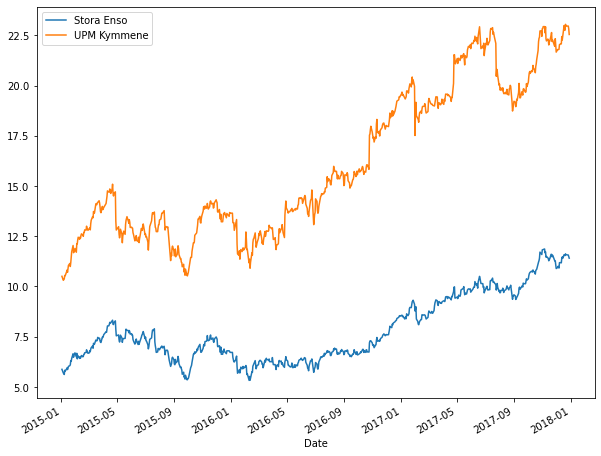

In [9]:
enso['Adj Close'].plot(figsize=(10,8), label= 'Stora Enso')
upm['Adj Close'].plot(label= 'UPM Kymmene')
plt.legend()

In [11]:
np.corrcoef(enso['Adj Close'],upm['Adj Close'])

array([[1.        , 0.91967717],
       [0.91967717, 1.        ]])

So Stora Enso and UPM Kymmene has a high correlation (0,9197) between their prices, but let's look their spread.

In [12]:
spread = upm['Adj Close']-enso['Adj Close']

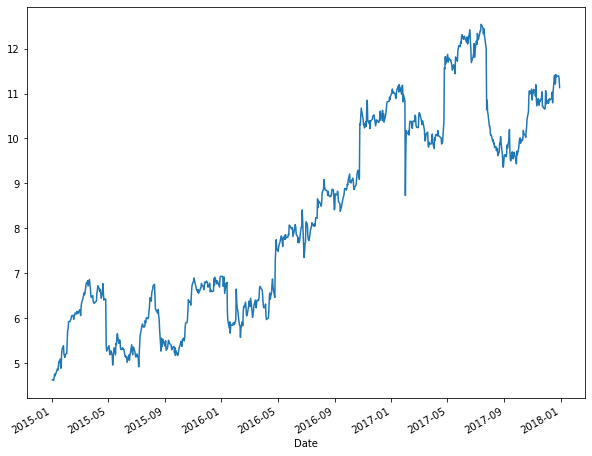

In [14]:
spread.plot(figsize = (10,8));

From this picture we see that the spread gets larger as time passes. So these two stocks are not cointegrated. So they are correlated but not cointegrated. 

## Microsoft and Apple

In [18]:
start1 = '2015-01-01'
end1 = '2018-01-01'

msft = web.DataReader('MSFT', data_source = 'yahoo', start= start1, end= end1 )
aapl = web.DataReader('AAPL', data_source = 'yahoo', start= start1, end= end1 )

In [19]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       755 non-null    float64
 1   Low        755 non-null    float64
 2   Open       755 non-null    float64
 3   Close      755 non-null    float64
 4   Volume     755 non-null    float64
 5   Adj Close  755 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


In [20]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       755 non-null    float64
 1   Low        755 non-null    float64
 2   Open       755 non-null    float64
 3   Close      755 non-null    float64
 4   Volume     755 non-null    float64
 5   Adj Close  755 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


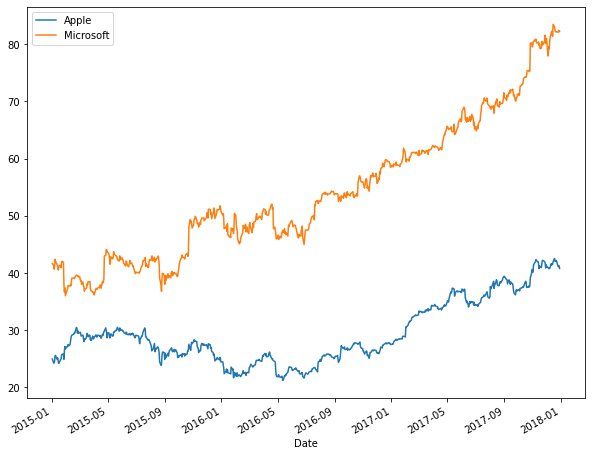

In [21]:
aapl['Adj Close'].plot(figsize=(10,8), label= 'Apple')
msft['Adj Close'].plot(label= 'Microsoft')
plt.legend();

In [22]:
np.corrcoef(msft['Adj Close'],aapl['Adj Close'])

array([[1.        , 0.79692202],
       [0.79692202, 1.        ]])

In [23]:
spread_tech = msft['Adj Close']-aapl['Adj Close']

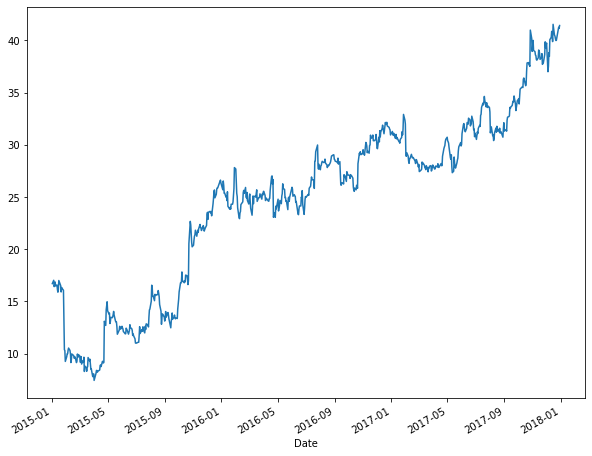

In [25]:
spread_tech.plot(figsize=(10,8));

These two stocks are correlated but not so highly and they are not cointegrated since their spread also gets larger over time.

## Brent Oil Futures and Crude Oil WTI Futures

In [26]:
start1 = '2015-01-01'
end1 = '2018-01-01'

brent_f = web.DataReader('BZ=F', data_source = 'yahoo')
wti_f = web.DataReader('CL=F', data_source = 'yahoo')

In [27]:
brent_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189 entries, 2020-01-03 to 2020-08-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       189 non-null    float64
 1   Low        189 non-null    float64
 2   Open       189 non-null    float64
 3   Close      189 non-null    float64
 4   Volume     189 non-null    float64
 5   Adj Close  189 non-null    float64
dtypes: float64(6)
memory usage: 10.3 KB


In [28]:
wti_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1272 entries, 2015-09-22 to 2020-09-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1272 non-null   float64
 1   Low        1272 non-null   float64
 2   Open       1272 non-null   float64
 3   Close      1272 non-null   float64
 4   Volume     1272 non-null   float64
 5   Adj Close  1272 non-null   float64
dtypes: float64(6)
memory usage: 69.6 KB


This data is not so easy to get because the futures contracts keep changing. I have to continue from this some other time.